# Couple Two Nets

Now we want to couple a power and gas net. So far, it is not possible, to couple also a heat net. But this will be implemented in the course of senergy nets project.

In [1]:
from pandapipes.multinet.create_multinet import create_empty_multinet, add_net_to_multinet
import pandapower as pp
import pandapipes as pps
from pandapipes.multinet.control.controller.multinet_control import P2GControlMultiEnergy
from pandapipes.multinet.control.run_control_multinet import run_control

mn = create_empty_multinet('coupled_nets')
enet = pp.from_json('./pp/net.json')
gnet = pps.from_json('./pps/net.json')
add_net_to_multinet(mn, enet, 'power')
add_net_to_multinet(mn, gnet, 'gas')


p2g_bus = 30
p2g_junction = 30

p2g_load = pp.create_load(enet, bus=p2g_bus, p_mw=0.2, name='P2G unit')
p2g_source = pps.create_source(gnet, junction=p2g_junction, mdot_kg_per_s = 0.001, name='P2G unit')

P2GControlMultiEnergy(mn, p2g_load, p2g_source, efficiency=0.7, name_power_net='power', name_gas_net='gas')

pp.runpp(enet)
pps.pipeflow(gnet, iter=20)

hp.pandapower.plotting.plotly.traces - INFO: Failed to import plotly - interactive plotting will not be available
hp.pandapower.control.util.auxiliary - INFO: Creating controller 0 of type <class 'pandapipes.multinet.control.controller.multinet_control.P2GControlMultiEnergy'> 


In [2]:
enet.res_load

,p_mw,q_mvar
0,0.04,0.01
1,0.04,0.01
2,0.04,0.01
3,0.04,0.01
4,0.04,0.01
5,0.04,0.01
6,0.04,0.01
7,0.04,0.01
8,0.20,0.00


In [3]:
gnet.res_source

,mdot_kg_per_s
0,0.0005
1,0.0005
2,0.0005
3,0.0010


In [4]:
run_control(mn, iter=20)

In [5]:
enet.res_load

,p_mw,q_mvar
0,0.04,0.01
1,0.04,0.01
2,0.04,0.01
3,0.04,0.01
4,0.04,0.01
5,0.04,0.01
6,0.04,0.01
7,0.04,0.01
8,0.20,0.00


In [6]:
gnet.res_source

,mdot_kg_per_s
0,0.000500
1,0.000500
2,0.000500
3,0.000987


# Plot Coupled Nets

Now, we plot the coupled grids:

hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.00392156862745098, 0.45098039215686275, 0.6980392156862745) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (31) to draw! The colors will be repeated to fit.
hp.pandapipes.plotting.collections - WARNING: use_junction_geodata is automatically set to True, since net.pipe_geodata is empty.
hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.8352941176470589, 0.3686274509803922, 0.0) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (8) to draw! The colors will be repeated to fit.
hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.8, 0.47058823529411764, 0.7372549019607844) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (4) to draw!

<AxesSubplot: >

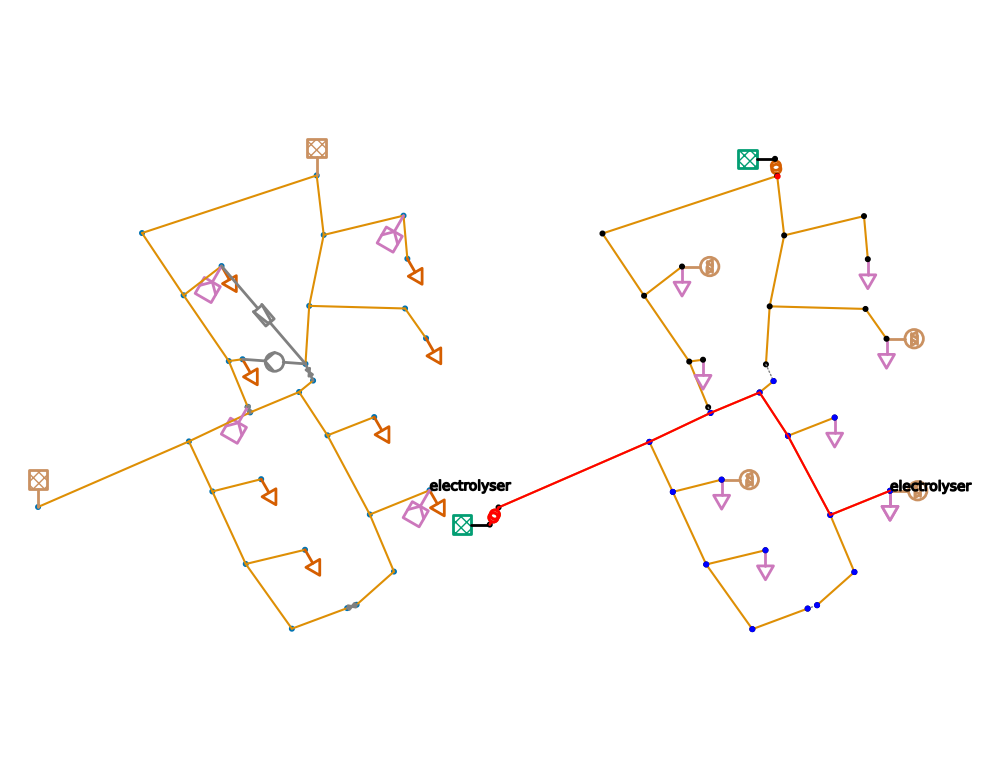

In [9]:
from pps.plotting import create_gas_net_collections2
from pp.plotting import create_power_net_collections
from controller import create_annotations
import matplotlib.pyplot as plt

import pandapower.plotting as plot

pps_coll = create_gas_net_collections2(gnet)
pp_coll = create_power_net_collections(enet)
ann = create_annotations(enet, gnet)
plot.draw_collections([pps_coll, pp_coll, ann])

hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.00392156862745098, 0.45098039215686275, 0.6980392156862745) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (31) to draw! The colors will be repeated to fit.
hp.pandapipes.plotting.collections - WARNING: use_junction_geodata is automatically set to True, since net.pipe_geodata is empty.
hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.8352941176470589, 0.3686274509803922, 0.0) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (8) to draw! The colors will be repeated to fit.
hp.pandapower.plotting.plotting_toolbox - INFO: Interpreting color (0.8, 0.47058823529411764, 0.7372549019607844) as rgb or rgba!
hp.pandapower.plotting.plotting_toolbox - WARNING: The number of given colors (1) is smaller than the number of nodes (4) to draw!

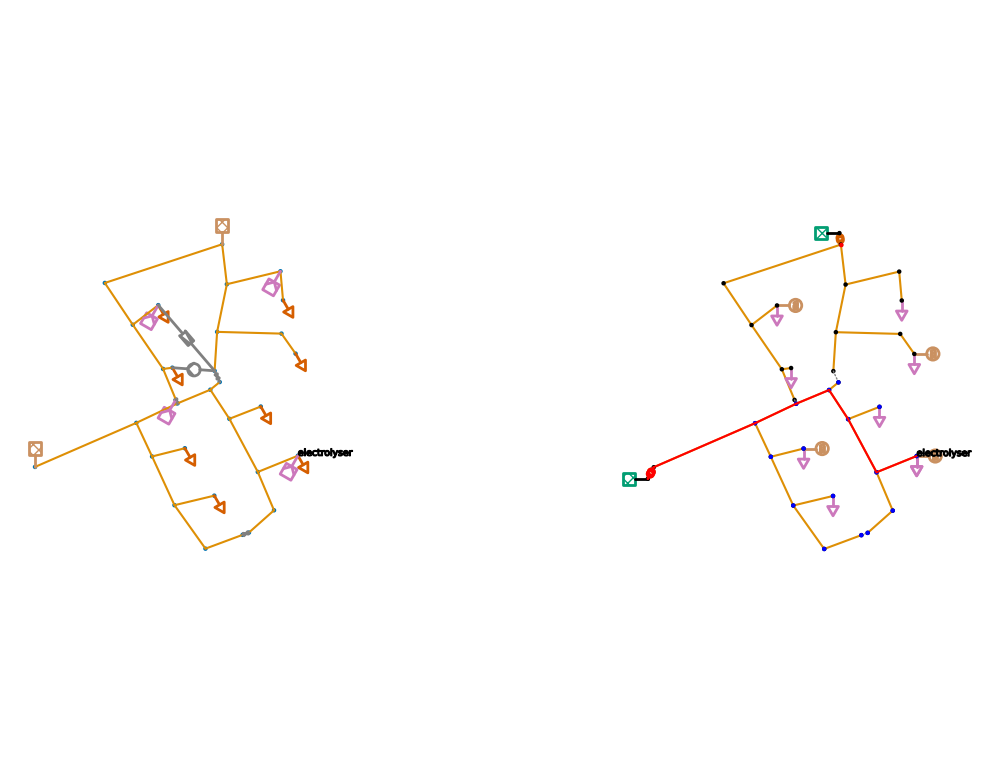

In [10]:
gnet.junction_geodata.x -= 1000

pps_coll = create_gas_net_collections2(gnet)
pp_coll = create_power_net_collections(enet)
ann = create_annotations(enet, gnet)
plot.draw_collections([pps_coll, pp_coll, ann])
plt.show()